# One-dimensional linearlized shallow water equaitons

Assume now $U=0$ for simplicity.

\begin{align}
\frac{\partial u}{\partial t} + g\frac{\partial h}{\partial x} &= 0 \\
\frac{\partial h}{\partial t} + H\frac{\partial u}{\partial x} &= 0
\end{align}

With the centred differences, the discrete dispersion relation for unstaggered mesh is

\begin{equation}
\sin\omega\Delta t = \pm c\frac{\Delta t}{\Delta x}\sin(k\Delta x)
\end{equation}

where $c\equiv \sqrt{gH}$.

Similarly the discrete dispersion relation for staggered mesh is

\begin{equation}
\sin\omega\Delta t = \pm c\frac{\Delta t}{\Delta x/2}\sin\left(k\frac{\Delta x}{2}\right).
\end{equation}

In the limit of fine temporal resolution ($\omega\Delta t\rightarrow 0$), the discrete phase speeds are
\begin{align}
c_\mathrm{u} &= c\frac{\sin(k\Delta x)}{k\Delta x}, \\
c_\mathrm{s} &= c\frac{\sin(k\Delta x/2)}{k\Delta x/2}.
\end{align}

In [1]:
import numpy as np

def cu(x):
    return np.sin(x) / x

def cs(x):
    return cu(0.5 * x)

The discrete group velocities are
\begin{align}
c_\mathrm{gu} &= c\cos(k\Delta x) \\
c_\mathrm{gs} &= c\cos\left(k\frac{\Delta x}{2}\right)
\end{align}

In [2]:
def cgu(x):
    return np.cos(x)

def cgs(x):
    return cgu(0.5 * x)

With the fourth order finite difference, the discrete dispersion relation for unstaggered mesh is

\begin{equation}
\sin\omega\Delta t = \pm c\frac{\Delta t}{\Delta x}\left[-\frac{1}{6}\sin(2k\Delta x) +  \frac{4}{3}\sin(k\Delta x)\right].
\end{equation}

The discrete phase speed and group velocity in the limite of fine temporal resolution are
\begin{align}
c_\mathrm{u4} &= \frac{c}{k\Delta x}\left[-\frac{1}{6}\sin(2k\Delta x) + \frac{4}{3}\sin(k\Delta x)\right] \\
c_\mathrm{gu4} &= c\left[-\frac{1}{3}\cos(2k\Delta x) + \frac{4}{3}\cos(k\Delta x)\right]
\end{align}

In [3]:
def cu4(x):
    return - np.sin(2 * x) / (6 * x)  + 4 / 3 * cu(x)
def cgu4(x):
    return -np.cos(2 * x) / 3 + 4 * cgu(x) / 3

In [4]:
import math
import matplotlib.pyplot as plt

def plotspeed(x, yu, ys, yu4, ylabel='phase speed', fname='phase_speed.pdf'):
    plt.rcParams['font.size'] = 18
    fig, ax1 = plt.subplots(figsize=(11, 7))
    y = np.ones(x.size)
    ax1.plot(x, y, color='black', linestyle=':', label='Exact')
    ax1.plot(x, yu, color='black', linestyle='--', label='Unstaggered 2nd')
    ax1.plot(x, ys, color='black', linestyle='-', label='Staggered')
    ax1.plot(x, yu4, color='black', linestyle='-.', label='Unstaggered 4th')
    ax1.set_xlabel('wave number')
    ax1.set_ylabel(ylabel)
    ax1.set_xticks([0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi])
    ax1.set_xticklabels(['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'])
    ax1.legend()

    ax2 = ax1.twiny()
    ax2.set_xlabel('wave length')
    lticks = [50, 10, 6, 4, 3, 2]
    ax2.set_xticks([math.tau / l for l in lticks])
    ax2.set_xticklabels([str(l) for l in lticks])

    fig.savefig(fname)
    plt.show()

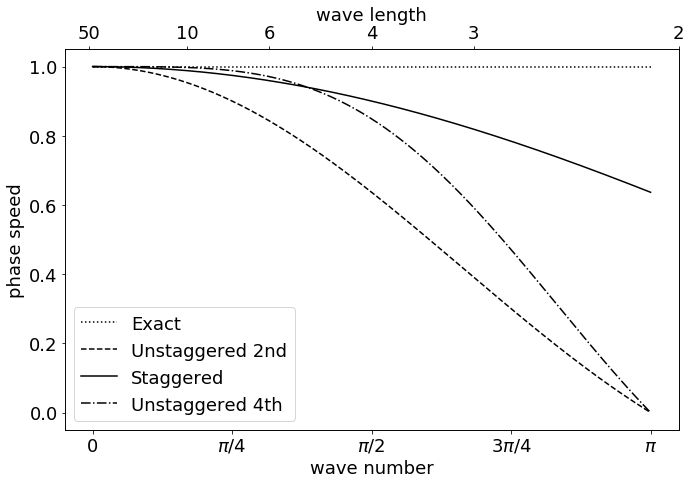

In [5]:
n = 500
x = np.linspace(1.0e-5, np.pi, n)
plotspeed(x, cu(x), cs(x), cu4(x))

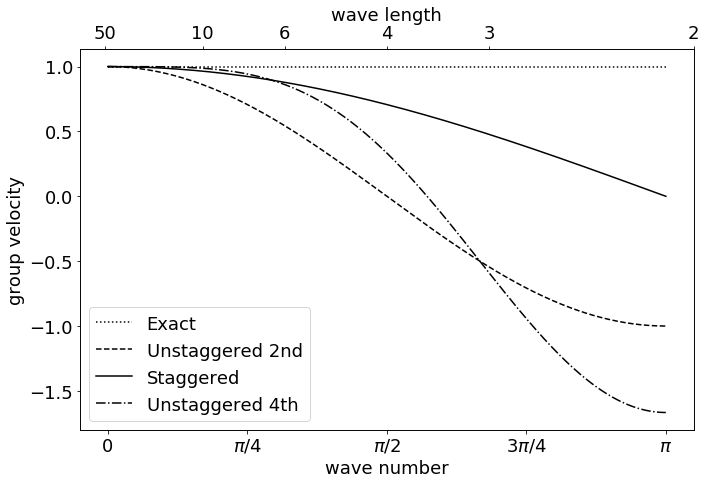

In [6]:
plotspeed(x, cgu(x), cgs(x), cgu4(x), 'group velocity', 'group_velocity.pdf')